Shape of the DataFrame: (42, 6)
Missing values:
 year    0
SMN     0
SMT     0
VCI     0
TCI     0
VHI     0
dtype: int64
Summary statistics:
               year        SMN         SMT        VCI        TCI        VHI
count    42.000000  42.000000   42.000000  42.000000  42.000000  42.000000
mean   2002.500000   0.095619  303.717857  45.470000  46.202143  45.846429
std      12.267844   0.008410    1.633828  10.869596  12.186818   8.902110
min    1982.000000   0.073000  298.130000  18.240000  23.820000  28.220000
25%    1992.250000   0.090000  303.157500  37.192500  39.085000  39.345000
50%    2002.500000   0.096000  304.180000  43.540000  43.265000  45.335000
75%    2012.750000   0.101750  304.502500  55.782500  51.327500  53.150000
max    2023.000000   0.111000  307.300000  64.970000  80.470000  69.900000
Data types:
 year      int64
SMN     float64
SMT     float64
VCI     float64
TCI     float64
VHI     float64
dtype: object


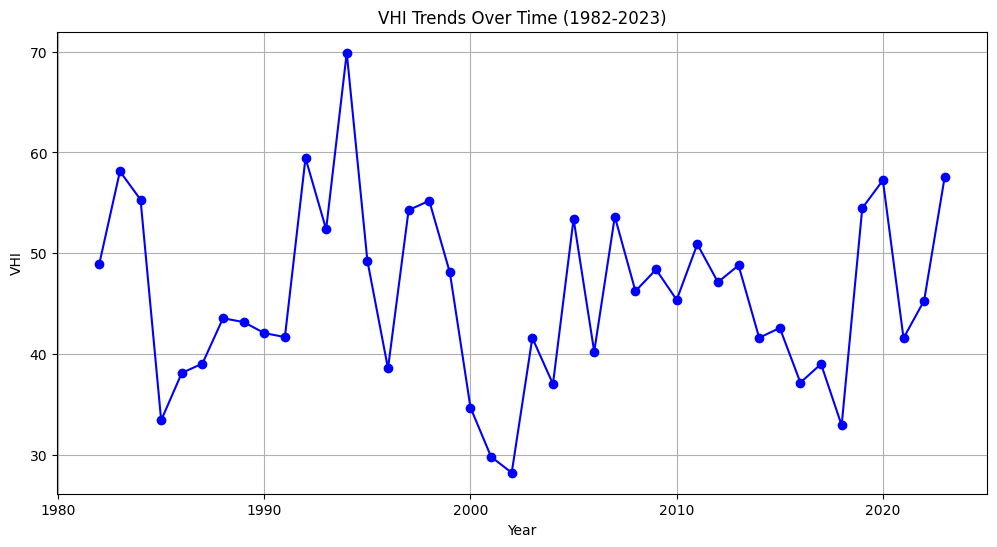

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the data as a dictionary
data = {
    "year": list(range(1982, 2024)),
    "SMN": [0.081, 0.092, 0.092, 0.086, 0.086, 0.085, 0.084, 0.095, 0.090, 0.087, 0.105, 0.101, 0.100, 0.102, 0.092, 0.096, 0.106, 0.098, 0.073, 0.087, 0.086, 0.091, 0.089, 0.104, 0.093, 0.111, 0.104, 0.105, 0.105, 0.105, 0.101, 0.100, 0.094, 0.096, 0.096, 0.095, 0.090, 0.100, 0.108, 0.098, 0.099, 0.108],
    "SMT": [301.30, 300.60, 301.42, 307.30, 303.94, 304.44, 301.40, 304.37, 304.48, 304.38, 302.05, 303.72, 298.13, 304.98, 305.16, 302.39, 304.02, 304.23, 303.28, 305.40, 306.57, 303.30, 303.21, 303.26, 304.28, 304.35, 304.98, 304.86, 304.69, 303.90, 304.25, 303.14, 304.13, 303.93, 304.86, 304.51, 305.41, 302.00, 302.57, 304.31, 304.23, 302.42],
    "VCI": [29.75, 43.03, 42.60, 35.26, 31.03, 34.50, 30.90, 44.70, 42.06, 38.91, 58.81, 56.14, 59.34, 55.61, 41.52, 46.42, 63.22, 51.00, 18.24, 31.77, 32.62, 36.62, 34.41, 55.43, 41.32, 64.97, 55.84, 58.30, 56.10, 57.12, 51.45, 48.76, 41.66, 42.31, 41.62, 41.00, 35.65, 48.34, 59.60, 44.05, 48.10, 59.66],
    "TCI": [68.16, 73.23, 68.04, 31.59, 45.20, 43.60, 56.21, 41.64, 42.10, 44.46, 60.08, 48.60, 80.47, 42.93, 35.61, 62.14, 47.20, 45.19, 51.14, 27.83, 23.82, 46.58, 39.62, 51.39, 39.13, 42.30, 36.63, 38.49, 34.63, 44.69, 42.80, 48.80, 41.47, 42.76, 32.67, 36.98, 30.19, 60.42, 54.67, 39.07, 42.54, 55.42],
    "VHI": [48.95, 58.13, 55.32, 33.42, 38.12, 39.05, 43.55, 43.17, 42.08, 41.68, 59.45, 52.37, 69.90, 49.27, 38.57, 54.28, 55.21, 48.09, 34.69, 29.80, 28.22, 41.60, 37.02, 53.41, 40.23, 53.64, 46.24, 48.39, 45.37, 50.90, 47.13, 48.80, 41.61, 42.59, 37.16, 39.01, 32.92, 54.48, 57.24, 41.58, 45.30, 57.61]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
df.head()
# Check the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Summary statistics
print("Summary statistics:\n", df.describe())

# Data types
print("Data types:\n", df.dtypes)
plt.figure(figsize=(12, 6))
plt.plot(df['year'], df['VHI'], marker='o', linestyle='-', color='b')
plt.title('VHI Trends Over Time (1982-2023)')
plt.xlabel('Year')
plt.ylabel('VHI')
plt.grid(True)
plt.show()

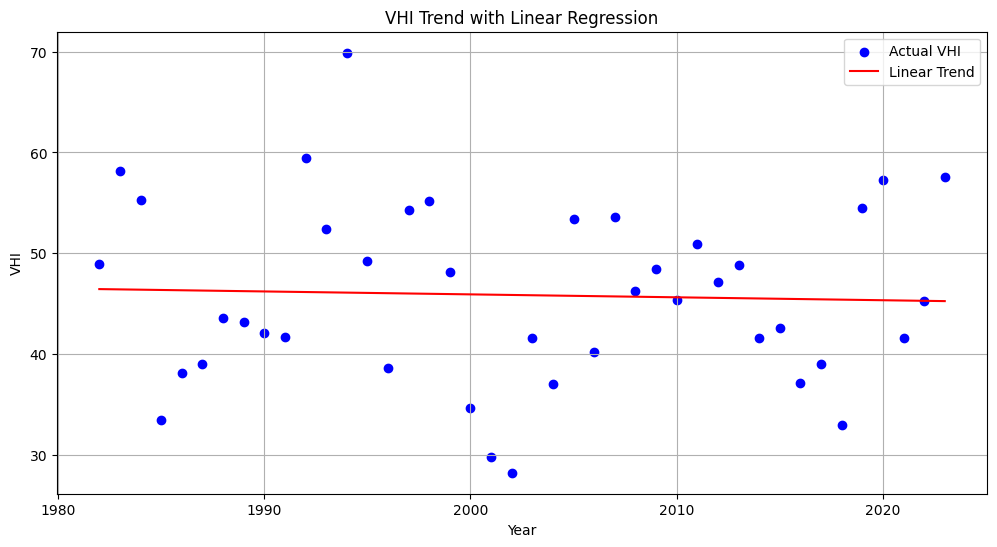

Slope (Trend): -0.029084352969775587


In [23]:
from sklearn.linear_model import LinearRegression

# Prepare data
X = df[['year']]
y = df['VHI']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(df['year'], df['VHI'], color='b', label='Actual VHI')
plt.plot(df['year'], y_pred, color='r', label='Linear Trend')
plt.title('VHI Trend with Linear Regression')
plt.xlabel('Year')
plt.ylabel('VHI')
plt.legend()
plt.grid(True)
plt.show()

# Print the slope (trend)
print("Slope (Trend):", model.coef_[0])

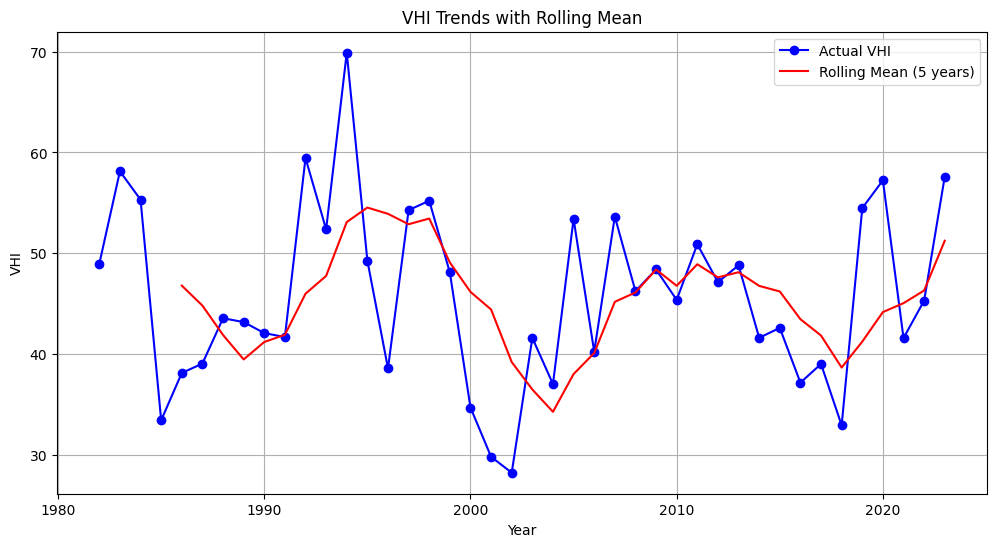

In [24]:
df['VHI_rolling'] = df['VHI'].rolling(window=5).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['year'], df['VHI'], marker='o', linestyle='-', color='b', label='Actual VHI')
plt.plot(df['year'], df['VHI_rolling'], linestyle='-', color='r', label='Rolling Mean (5 years)')
plt.title('VHI Trends with Rolling Mean')
plt.xlabel('Year')
plt.ylabel('VHI')
plt.legend()
plt.grid(True)
plt.show()

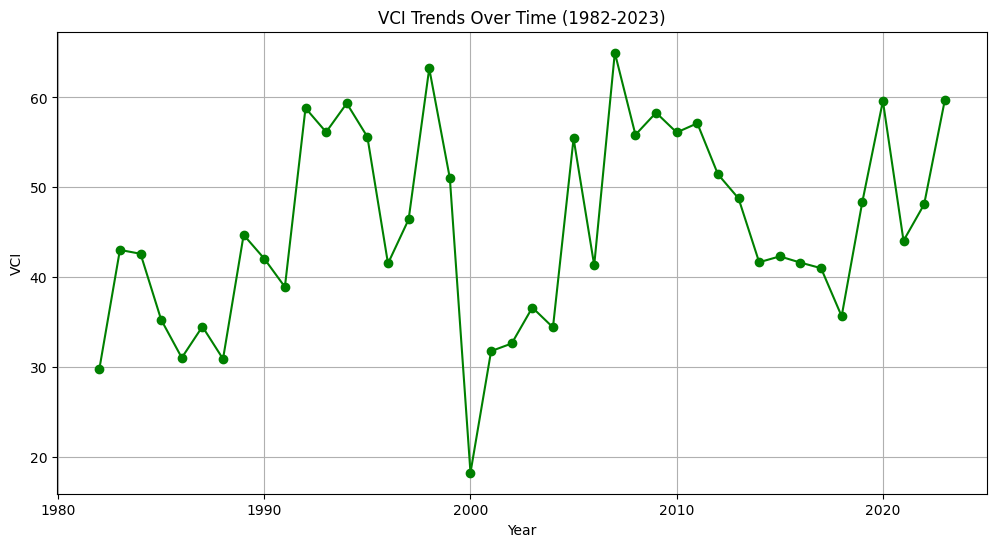

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(df['year'], df['VCI'], marker='o', linestyle='-', color='g')
plt.title('VCI Trends Over Time (1982-2023)')
plt.xlabel('Year')
plt.ylabel('VCI')
plt.grid(True)
plt.show()

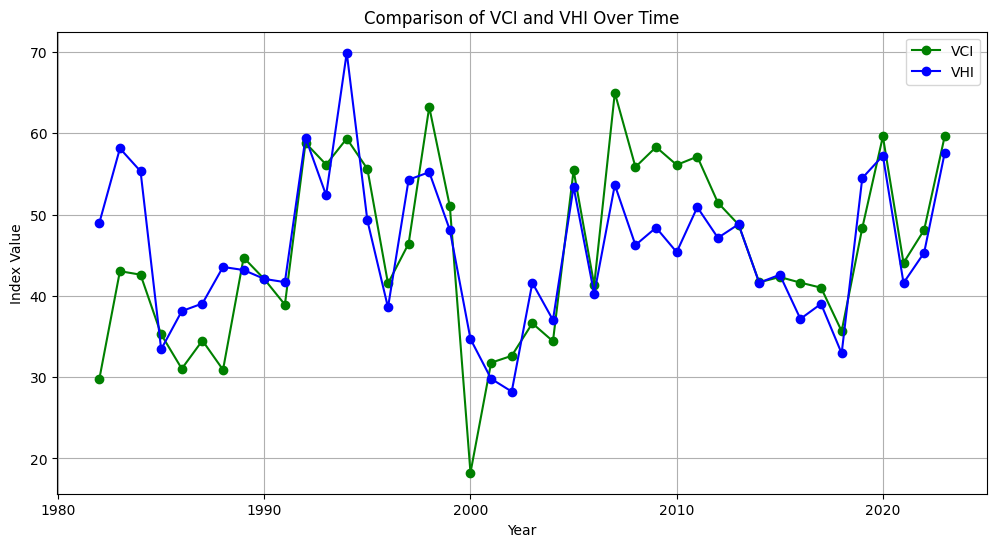

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(df['year'], df['VCI'], marker='o', linestyle='-', color='g', label='VCI')
plt.plot(df['year'], df['VHI'], marker='o', linestyle='-', color='b', label='VHI')
plt.title('Comparison of VCI and VHI Over Time')
plt.xlabel('Year')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# Define the drought threshold
drought_threshold = 35

# Identify drought years
drought_years = df[df['VHI'] < drought_threshold]

# Display drought years
print("Drought Years (VHI < 35):")
print(drought_years[['year', 'VHI']])

Drought Years (VHI < 35):
    year    VHI
3   1985  33.42
18  2000  34.69
19  2001  29.80
20  2002  28.22
36  2018  32.92


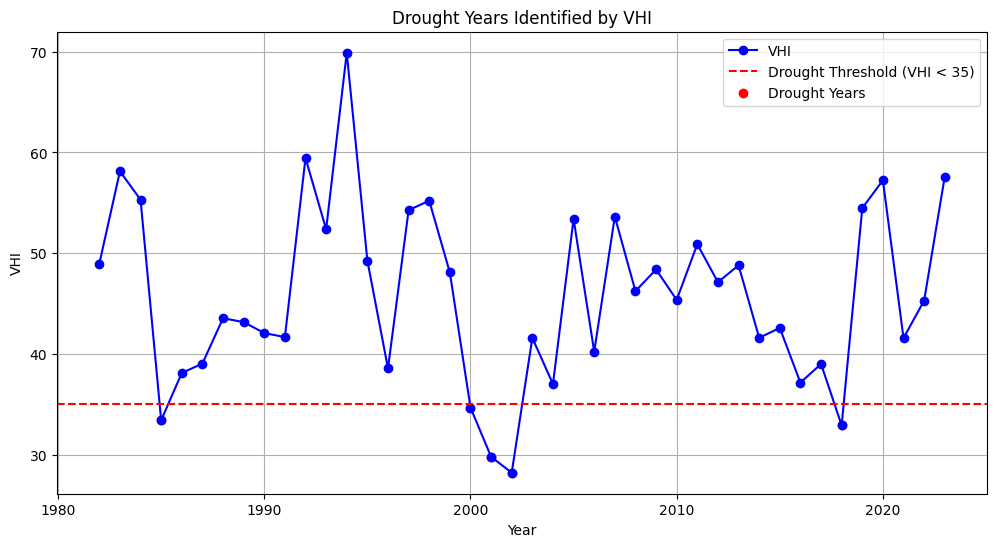

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(df['year'], df['VHI'], marker='o', linestyle='-', color='b', label='VHI')
plt.axhline(y=drought_threshold, color='r', linestyle='--', label='Drought Threshold (VHI < 35)')
plt.scatter(drought_years['year'], drought_years['VHI'], color='r', label='Drought Years')
plt.title('Drought Years Identified by VHI')
plt.xlabel('Year')
plt.ylabel('VHI')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
drought_frequency = len(drought_years)
print(f"Number of drought years (VHI < 35): {drought_frequency}")

Number of drought years (VHI < 35): 5


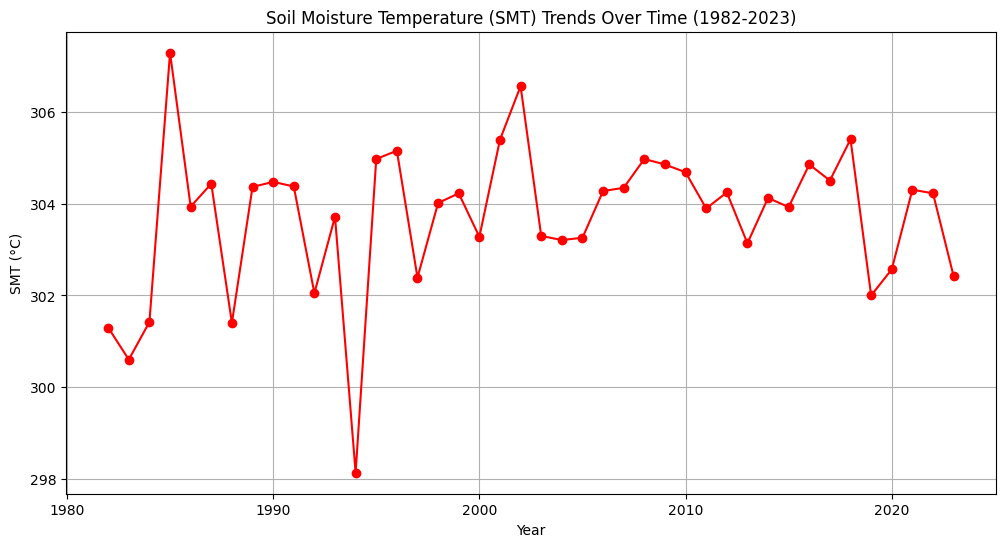

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(df['year'], df['SMT'], marker='o', linestyle='-', color='red')
plt.title('Soil Moisture Temperature (SMT) Trends Over Time (1982-2023)')
plt.xlabel('Year')
plt.ylabel('SMT (°C)')
plt.grid(True)
plt.show()

In [32]:
correlation = df['SMT'].corr(df['VHI'])
print(f"Correlation between SMT and VHI: {correlation:.2f}")

Correlation between SMT and VHI: -0.74


In [33]:
# Hypothetical wind speed data (replace with actual data)
wind_speed = [2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6]

# Add wind speed to the DataFrame
df['wind_speed'] = wind_speed

# Display the updated DataFrame
print(df.head())

   year    SMN     SMT    VCI    TCI    VHI  VHI_rolling  wind_speed
0  1982  0.081  301.30  29.75  68.16  48.95          NaN         2.5
1  1983  0.092  300.60  43.03  73.23  58.13          NaN         2.6
2  1984  0.092  301.42  42.60  68.04  55.32          NaN         2.7
3  1985  0.086  307.30  35.26  31.59  33.42          NaN         2.8
4  1986  0.086  303.94  31.03  45.20  38.12       46.788         2.9


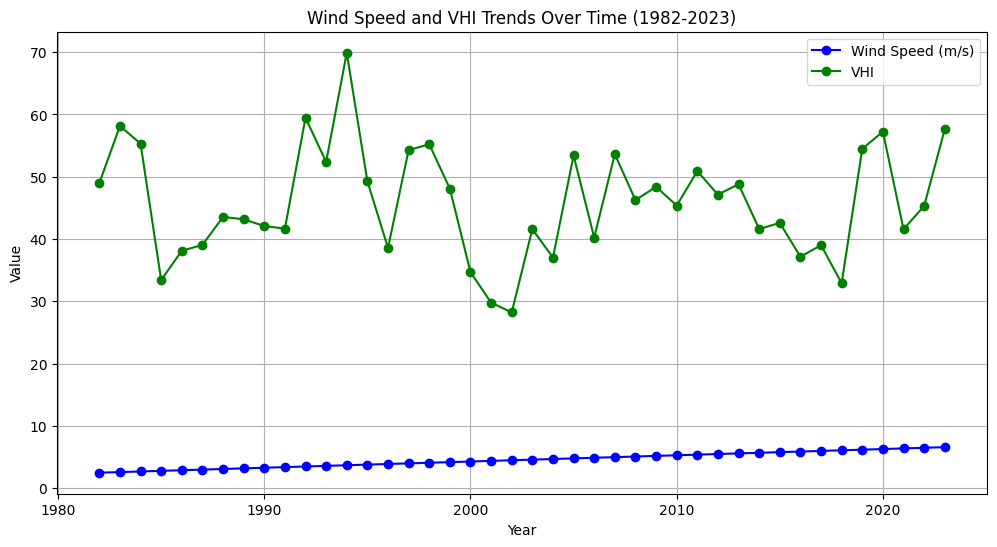

In [34]:
# Plot wind speed and VHI trends
plt.figure(figsize=(12, 6))
plt.plot(df['year'], df['wind_speed'], marker='o', linestyle='-', color='blue', label='Wind Speed (m/s)')
plt.plot(df['year'], df['VHI'], marker='o', linestyle='-', color='green', label='VHI')
plt.title('Wind Speed and VHI Trends Over Time (1982-2023)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

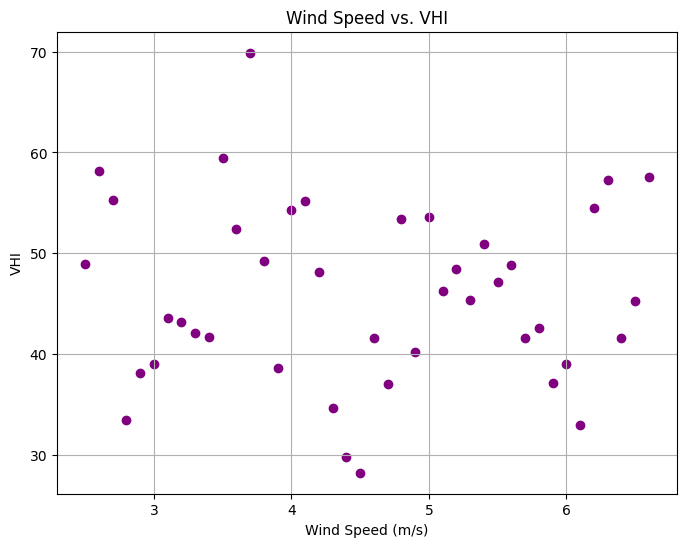

In [35]:
# Scatter plot of wind speed vs. VHI
plt.figure(figsize=(8, 6))
plt.scatter(df['wind_speed'], df['VHI'], color='purple')
plt.title('Wind Speed vs. VHI')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('VHI')
plt.grid(True)
plt.show()

In [36]:
# Calculate correlation
correlation = df['wind_speed'].corr(df['VHI'])
print(f"Correlation between Wind Speed and VHI: {correlation:.2f}")

Correlation between Wind Speed and VHI: -0.04


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['year'], df['VHI'])

# Display the results
print("Linear Regression Results:")
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")

Linear Regression Results:
Slope: -0.0291
Intercept: 104.0878
R-squared: 0.0016
P-value: 0.8010


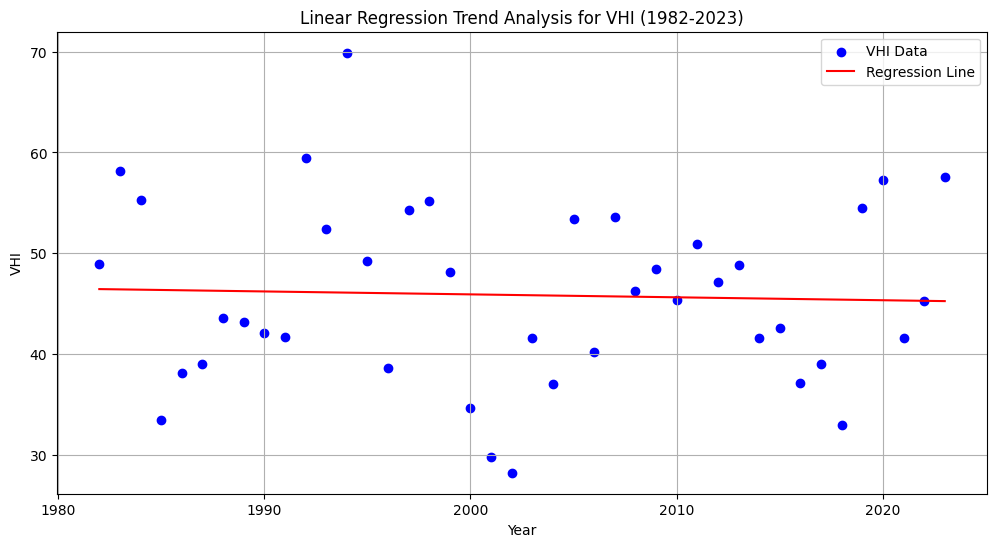

In [40]:
# Plot the data and regression line
plt.figure(figsize=(12, 6))
plt.scatter(df['year'], df['VHI'], color='blue', label='VHI Data')
plt.plot(df['year'], intercept + slope * df['year'], color='red', label='Regression Line')
plt.title('Linear Regression Trend Analysis for VHI (1982-2023)')
plt.xlabel('Year')
plt.ylabel('VHI')
plt.legend()
plt.grid(True)
plt.show()

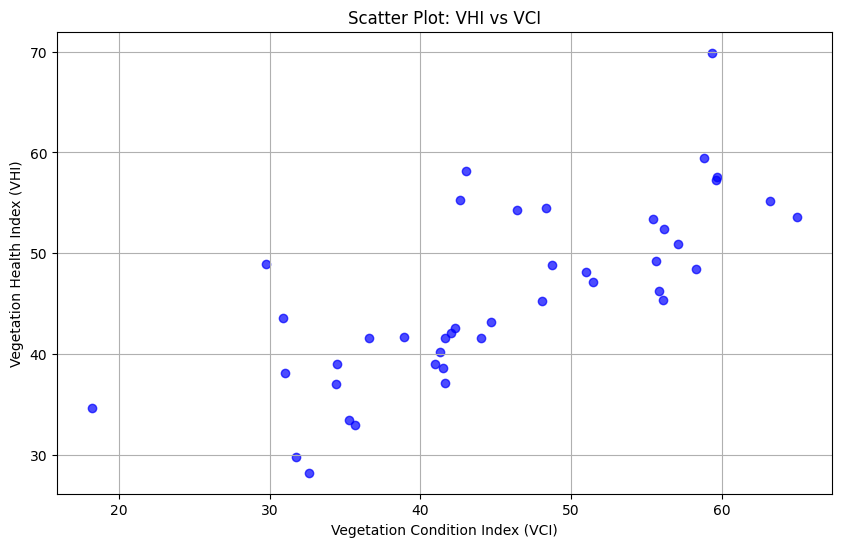

In [44]:
import matplotlib.pyplot as plt

# Create a scatter plot between VHI and VCI
plt.figure(figsize=(10, 6))
plt.scatter(df['VCI'], df['VHI'], color='blue', alpha=0.7)
plt.title('Scatter Plot: VHI vs VCI')
plt.xlabel('Vegetation Condition Index (VCI)')
plt.ylabel('Vegetation Health Index (VHI)')
plt.grid(True)
plt.show()

In [4]:
import pandas as pd

# Example dataset
data = {
    "year": [1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    "SMN": [0.081, 0.092, 0.092, 0.086, 0.086, 0.085, 0.084, 0.095, 0.090, 0.087, 0.105, 0.101, 0.100, 0.102, 0.092, 0.096, 0.106, 0.098, 0.073, 0.087, 0.086, 0.091, 0.089, 0.104, 0.093, 0.111, 0.104, 0.105, 0.105, 0.105, 0.101, 0.100, 0.094, 0.096, 0.096, 0.095, 0.090, 0.100, 0.108, 0.098, 0.099, 0.108],
    "SMT": [301.30, 300.60, 301.42, 307.30, 303.94, 304.44, 301.40, 304.37, 304.48, 304.38, 302.05, 303.72, 298.13, 304.98, 305.16, 302.39, 304.02, 304.23, 303.28, 305.40, 306.57, 303.30, 303.21, 303.26, 304.28, 304.35, 304.98, 304.86, 304.69, 303.90, 304.25, 303.14, 304.13, 303.93, 304.86, 304.51, 305.41, 302.00, 302.57, 304.31, 304.23, 302.42],
    "VCI": [29.75, 43.03, 42.60, 35.26, 31.03, 34.50, 30.90, 44.70, 42.06, 38.91, 58.81, 56.14, 59.34, 55.61, 41.52, 46.42, 63.22, 51.00, 18.24, 31.77, 32.62, 36.62, 34.41, 55.43, 41.32, 64.97, 55.84, 58.30, 56.10, 57.12, 51.45, 48.76, 41.66, 42.31, 41.62, 41.00, 35.65, 48.34, 59.60, 44.05, 48.10, 59.66],
    "TCI": [68.16, 73.23, 68.04, 31.59, 45.20, 43.60, 56.21, 41.64, 42.10, 44.46, 60.08, 48.60, 80.47, 42.93, 35.61, 62.14, 47.20, 45.19, 51.14, 27.83, 23.82, 46.58, 39.62, 51.39, 39.13, 42.30, 36.63, 38.49, 34.63, 44.69, 42.80, 48.80, 41.47, 42.76, 32.67, 36.98, 30.19, 60.42, 54.67, 39.07, 42.54, 55.42],
    "VHI": [48.95, 58.13, 55.32, 33.42, 38.12, 39.05, 43.55, 43.17, 42.08, 41.68, 59.45, 52.37, 69.90, 49.27, 38.57, 54.28, 55.21, 48.09, 34.69, 29.80, 28.22, 41.60, 37.02, 53.41, 40.23, 53.64, 46.24, 48.39, 45.37, 50.90, 47.13, 48.80, 41.61, 42.59, 37.16, 39.01, 32.92, 54.48, 57.24, 41.58, 45.30, 57.61]
}

df = pd.DataFrame(data)

In [5]:
# Calculate the long-term mean (climatology) of VHI
vhi_climatology = df["VHI"].mean()

# Compute annual anomalies
df["VHI_Annual_Anomaly"] = df["VHI"] - vhi_climatology

print(df[["year", "VHI", "VHI_Annual_Anomaly"]])

    year    VHI  VHI_Annual_Anomaly
0   1982  48.95            3.103571
1   1983  58.13           12.283571
2   1984  55.32            9.473571
3   1985  33.42          -12.426429
4   1986  38.12           -7.726429
5   1987  39.05           -6.796429
6   1988  43.55           -2.296429
7   1989  43.17           -2.676429
8   1990  42.08           -3.766429
9   1991  41.68           -4.166429
10  1992  59.45           13.603571
11  1993  52.37            6.523571
12  1994  69.90           24.053571
13  1995  49.27            3.423571
14  1996  38.57           -7.276429
15  1997  54.28            8.433571
16  1998  55.21            9.363571
17  1999  48.09            2.243571
18  2000  34.69          -11.156429
19  2001  29.80          -16.046429
20  2002  28.22          -17.626429
21  2003  41.60           -4.246429
22  2004  37.02           -8.826429
23  2005  53.41            7.563571
24  2006  40.23           -5.616429
25  2007  53.64            7.793571
26  2008  46.24            0

In [6]:
# Calculate the standard deviation of VHI
vhi_std = df["VHI"].std()

# Standardize the annual anomalies
df["VHI_Standardized_Anomaly"] = df["VHI_Annual_Anomaly"] / vhi_std

print(df[["year", "VHI", "VHI_Annual_Anomaly", "VHI_Standardized_Anomaly"]])

    year    VHI  VHI_Annual_Anomaly  VHI_Standardized_Anomaly
0   1982  48.95            3.103571                  0.348633
1   1983  58.13           12.283571                  1.379849
2   1984  55.32            9.473571                  1.064194
3   1985  33.42          -12.426429                 -1.395897
4   1986  38.12           -7.726429                 -0.867932
5   1987  39.05           -6.796429                 -0.763463
6   1988  43.55           -2.296429                 -0.257965
7   1989  43.17           -2.676429                 -0.300651
8   1990  42.08           -3.766429                 -0.423094
9   1991  41.68           -4.166429                 -0.468027
10  1992  59.45           13.603571                  1.528129
11  1993  52.37            6.523571                  0.732812
12  1994  69.90           24.053571                  2.702008
13  1995  49.27            3.423571                  0.384580
14  1996  38.57           -7.276429                 -0.817382
15  1997

Matplotlib is building the font cache; this may take a moment.


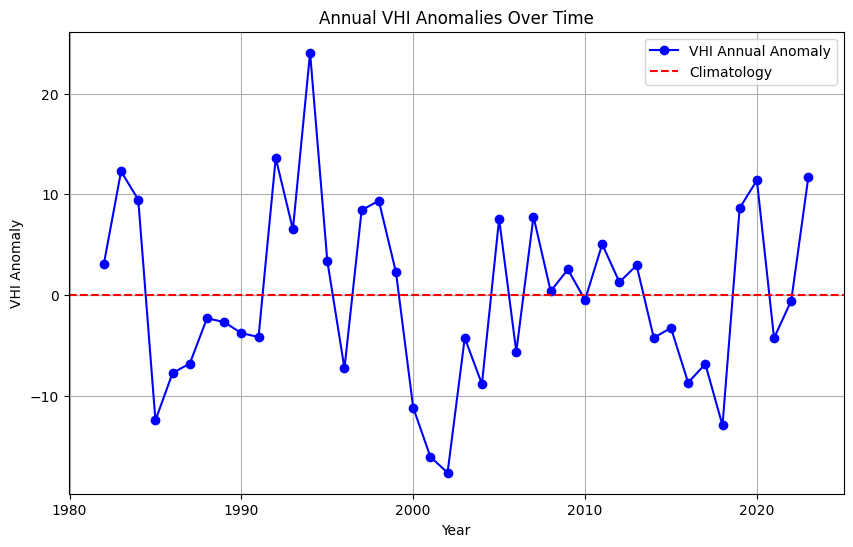

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df["year"], df["VHI_Annual_Anomaly"], marker="o", color="b", label="VHI Annual Anomaly")
plt.axhline(0, color="r", linestyle="--", label="Climatology")
plt.title("Annual VHI Anomalies Over Time")
plt.xlabel("Year")
plt.ylabel("VHI Anomaly")
plt.legend()
plt.grid(True)
plt.show()

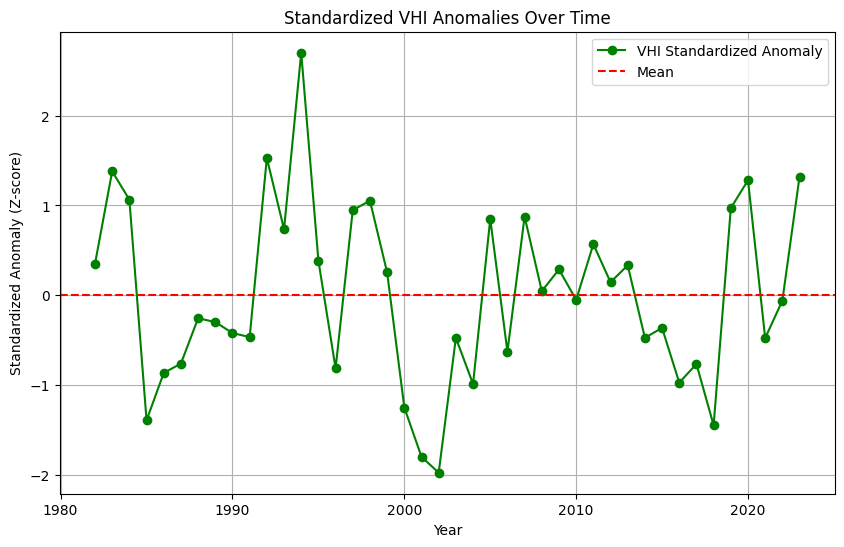

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(df["year"], df["VHI_Standardized_Anomaly"], marker="o", color="g", label="VHI Standardized Anomaly")
plt.axhline(0, color="r", linestyle="--", label="Mean")
plt.title("Standardized VHI Anomalies Over Time")
plt.xlabel("Year")
plt.ylabel("Standardized Anomaly (Z-score)")
plt.legend()
plt.grid(True)
plt.show()

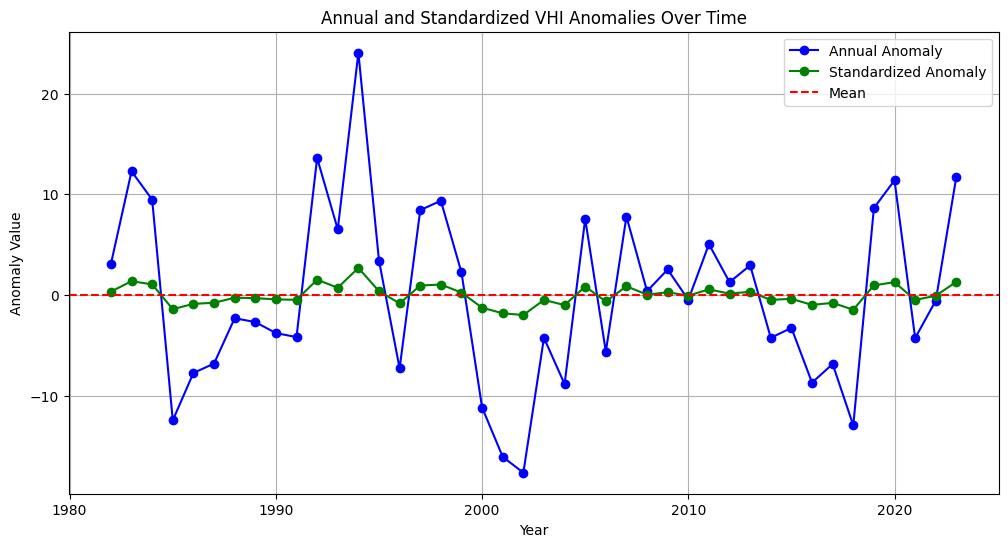

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df["year"], df["VHI_Annual_Anomaly"], marker="o", color="b", label="Annual Anomaly")
plt.plot(df["year"], df["VHI_Standardized_Anomaly"], marker="o", color="g", label="Standardized Anomaly")
plt.axhline(0, color="r", linestyle="--", label="Mean")
plt.title("Annual and Standardized VHI Anomalies Over Time")
plt.xlabel("Year")
plt.ylabel("Anomaly Value")
plt.legend()
plt.grid(True)
plt.show()

In [5]:
import pandas as pd
import numpy as np
from scipy.stats import kendalltau
from scipy.stats import norm

# Function to perform Mann-Kendall test
def mann_kendall_test(data, alpha=0.05):
    """
    Perform Mann-Kendall test for trend detection.
    
    Parameters:
        data (pd.Series or np.array): Time series data.
        alpha (float): Significance level (default: 0.05).
    
    Returns:
        trend (str): 'increasing', 'decreasing', or 'no trend'.
        p_value (float): p-value of the test.
        z (float): Z-score of the test.
        s (float): Mann-Kendall S statistic.
    """
    n = len(data)
    s = 0

    # Calculate the S statistic
    for i in range(n - 1):
        for j in range(i + 1, n):
            s += np.sign(data[j] - data[i])

    # Calculate the variance of S
    var_s = (n * (n - 1) * (2 * n + 5)) / 18

    # Calculate the Z-score
    if s > 0:
        z = (s - 1) / np.sqrt(var_s)
    elif s < 0:
        z = (s + 1) / np.sqrt(var_s)
    else:
        z = 0

    # Calculate the p-value
    p_value = 2 * (1 - norm.cdf(abs(z)))  # Two-tailed test

    # Determine the trend
    if p_value < alpha:
        if z > 0:
            trend = 'increasing'
        else:
            trend = 'decreasing'
    else:
        trend = 'no trend'

    return trend, p_value, z, s

# Example DataFrame (replace with your actual data)
data = {
    'Year': [1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'VHI': [48.95, 58.13, 55.32, 33.42, 38.12, 39.05, 43.55, 43.17, 42.08, 41.68, 59.45, 52.37, 69.90, 49.27, 38.57, 54.28, 55.21, 48.09, 34.69, 29.80, 28.22, 41.60, 37.02, 53.41, 40.23, 53.64, 46.24, 48.39, 45.37, 50.90, 47.13, 48.80, 41.61, 42.59, 37.16, 39.01, 32.92, 54.48, 57.24, 41.58, 45.30, 57.61]
}
df = pd.DataFrame(data)

# Perform Mann-Kendall test on VHI data
trend, p_value, z, s = mann_kendall_test(df['VHI'])

# Output results
print(f"Trend: {trend}")
print(f"P-value: {p_value:.4f}")
print(f"Z-score: {z:.4f}")
print(f"S statistic: {s}")

Trend: no trend
P-value: 0.7948
Z-score: -0.2601
S statistic: -25.0


In [7]:
import pandas as pd

# Example dataset
data = {
    "year": [1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    "SMN": [0.081, 0.092, 0.092, 0.086, 0.086, 0.085, 0.084, 0.095, 0.090, 0.087, 0.105, 0.101, 0.100, 0.102, 0.092, 0.096, 0.106, 0.098, 0.073, 0.087, 0.086, 0.091, 0.089, 0.104, 0.093, 0.111, 0.104, 0.105, 0.105, 0.105, 0.101, 0.100, 0.094, 0.096, 0.096, 0.095, 0.090, 0.100, 0.108, 0.098, 0.099, 0.108],
    "SMT": [301.30, 300.60, 301.42, 307.30, 303.94, 304.44, 301.40, 304.37, 304.48, 304.38, 302.05, 303.72, 298.13, 304.98, 305.16, 302.39, 304.02, 304.23, 303.28, 305.40, 306.57, 303.30, 303.21, 303.26, 304.28, 304.35, 304.98, 304.86, 304.69, 303.90, 304.25, 303.14, 304.13, 303.93, 304.86, 304.51, 305.41, 302.00, 302.57, 304.31, 304.23, 302.42],
    "VCI": [29.75, 43.03, 42.60, 35.26, 31.03, 34.50, 30.90, 44.70, 42.06, 38.91, 58.81, 56.14, 59.34, 55.61, 41.52, 46.42, 63.22, 51.00, 18.24, 31.77, 32.62, 36.62, 34.41, 55.43, 41.32, 64.97, 55.84, 58.30, 56.10, 57.12, 51.45, 48.76, 41.66, 42.31, 41.62, 41.00, 35.65, 48.34, 59.60, 44.05, 48.10, 59.66],
    "TCI": [68.16, 73.23, 68.04, 31.59, 45.20, 43.60, 56.21, 41.64, 42.10, 44.46, 60.08, 48.60, 80.47, 42.93, 35.61, 62.14, 47.20, 45.19, 51.14, 27.83, 23.82, 46.58, 39.62, 51.39, 39.13, 42.30, 36.63, 38.49, 34.63, 44.69, 42.80, 48.80, 41.47, 42.76, 32.67, 36.98, 30.19, 60.42, 54.67, 39.07, 42.54, 55.42],
    "VHI": [48.95, 58.13, 55.32, 33.42, 38.12, 39.05, 43.55, 43.17, 42.08, 41.68, 59.45, 52.37, 69.90, 49.27, 38.57, 54.28, 55.21, 48.09, 34.69, 29.80, 28.22, 41.60, 37.02, 53.41, 40.23, 53.64, 46.24, 48.39, 45.37, 50.90, 47.13, 48.80, 41.61, 42.59, 37.16, 39.01, 32.92, 54.48, 57.24, 41.58, 45.30, 57.61]
}

df = pd.DataFrame(data)

In [8]:
# Calculate the long-term mean (climatology) of VHI
vhi_climatology = df["VHI"].mean()

# Compute annual anomalies
df["VHI_Annual_Anomaly"] = df["VHI"] - vhi_climatology

print(df[["year", "VHI", "VHI_Annual_Anomaly"]])

    year    VHI  VHI_Annual_Anomaly
0   1982  48.95            3.103571
1   1983  58.13           12.283571
2   1984  55.32            9.473571
3   1985  33.42          -12.426429
4   1986  38.12           -7.726429
5   1987  39.05           -6.796429
6   1988  43.55           -2.296429
7   1989  43.17           -2.676429
8   1990  42.08           -3.766429
9   1991  41.68           -4.166429
10  1992  59.45           13.603571
11  1993  52.37            6.523571
12  1994  69.90           24.053571
13  1995  49.27            3.423571
14  1996  38.57           -7.276429
15  1997  54.28            8.433571
16  1998  55.21            9.363571
17  1999  48.09            2.243571
18  2000  34.69          -11.156429
19  2001  29.80          -16.046429
20  2002  28.22          -17.626429
21  2003  41.60           -4.246429
22  2004  37.02           -8.826429
23  2005  53.41            7.563571
24  2006  40.23           -5.616429
25  2007  53.64            7.793571
26  2008  46.24            0

In [9]:
import pymannkendall as mk

# Perform Mann-Kendall test on VHI Annual Anomalies
result = mk.original_test(df["VHI_Annual_Anomaly"])

# Print the results
print("Mann-Kendall Test Results for VHI Annual Anomalies:")
print(f"Trend: {result.trend}")
print(f"S statistic: {result.s}")
print(f"P-value: {result.p}")
print(f"Z statistic: {result.z}")
print(f"Sen's Slope: {result.slope}")
print(f"Intercept: {result.intercept}")

Mann-Kendall Test Results for VHI Annual Anomalies:
Trend: no trend
S statistic: -25.0
P-value: 0.7947886866284579
Z statistic: -0.26009734399295664
Sen's Slope: -0.019583333333333286
Intercept: -0.10997023809523832


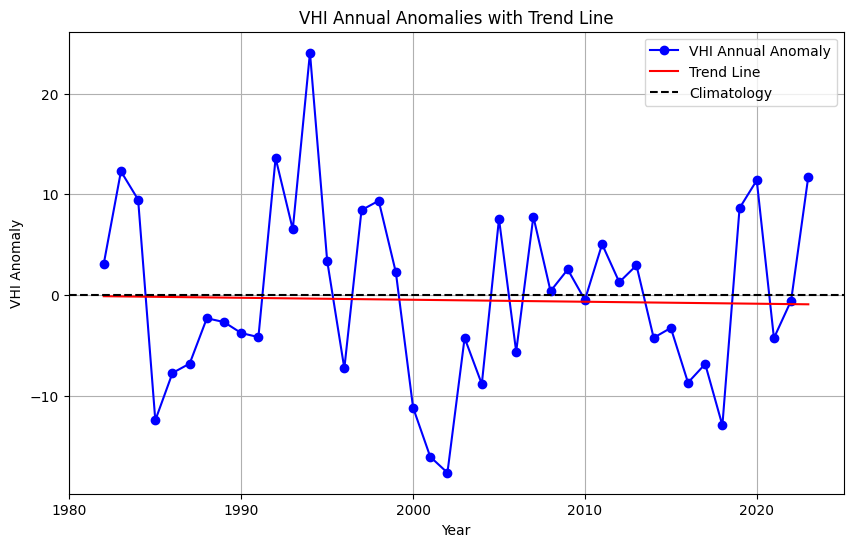

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the VHI Annual Anomalies with the trend line
plt.figure(figsize=(10, 6))
plt.plot(df["year"], df["VHI_Annual_Anomaly"], marker="o", color="b", label="VHI Annual Anomaly")
plt.plot(df["year"], result.intercept + result.slope * (df["year"] - df["year"].min()), color="r", label="Trend Line")
plt.axhline(0, color="k", linestyle="--", label="Climatology")
plt.title("VHI Annual Anomalies with Trend Line")
plt.xlabel("Year")
plt.ylabel("VHI Anomaly")
plt.legend()
plt.grid(True)
plt.show()